<a href="https://colab.research.google.com/github/avanish04/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# importing the dataset and necessory libraries


In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [94]:
#importing the dataset with the help of pandas
demand_df=pd.read_csv('/content/drive/MyDrive/ML capstone bike sharing demand/SeoulBikeData.csv',encoding= 'unicode_escape')


# High level look of our dataset


In [95]:
#over view of our dataset
demand_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [96]:
demand_df.shape

(8760, 14)

In [97]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**from the above outcome our dataset contains float64(6), int64(4), object(4) data types and it has : 8760 rows and 14 features**

In [98]:
demand_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [99]:
# percentile list
perc =[.25, .50, .75, .95]
demand_df.describe(percentiles=perc)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
95%,2043.000000,22.000000,30.700000,94.000000,3.700000,2000.000000,22.405000,2.560000,0.400000,0.200000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [100]:
demand_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,21/09/2018,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760,NaN,NaN,NaN,704.602,644.997,0,191,504.5,1065.25,3556
Hour,8760,NaN,NaN,NaN,11.5,6.92258,0,5.75,11.5,17.25,23
Temperature(°C),8760,NaN,NaN,NaN,12.8829,11.9448,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760,NaN,NaN,NaN,58.2263,20.3624,0,42,57,74,98
Wind speed (m/s),8760,NaN,NaN,NaN,1.72491,1.0363,0,0.9,1.5,2.3,7.4
Visibility (10m),8760,NaN,NaN,NaN,1436.83,608.299,27,940,1698,2000,2000
Dew point temperature(°C),8760,NaN,NaN,NaN,4.07381,13.0604,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760,NaN,NaN,NaN,0.569111,0.868746,0,0,0.01,0.93,3.52
Rainfall(mm),8760,NaN,NaN,NaN,0.148687,1.12819,0,0,0,0,35


In [101]:
demand_df[demand_df.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [102]:
demand_df.isnull().values.any()


False

In [103]:
demand_df.isnull().sum().sum()

0

**from above experiments we can say our dataset doesnot contain null values 
and duplicate values**

# EDA

first making a copy of our original dataset


In [104]:
df=demand_df.copy()

In [105]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


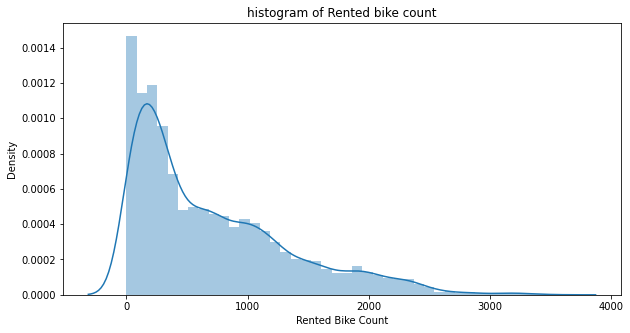

In [106]:
# histogram of bike count
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('histogram of Rented bike count')
ax=sns.distplot(df['Rented Bike Count'] )

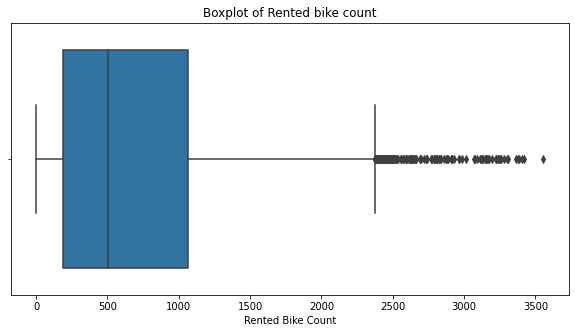

In [107]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Boxplot of Rented bike count')
ax=sns.boxplot(df['Rented Bike Count'])

from the above box plot and the histogram we see that in our rented bike counts contains some outliers.

**outliers treatment**

In [108]:
percentile_q1 = np.percentile(df['Rented Bike Count'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['Rented Bike Count'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['Rented Bike Count'],75)
print(percentile_q3)

191.0
504.5
1065.25


In [109]:
IQR=percentile_q3-percentile_q1
print(IQR)
lower_side_outlier=percentile_q1-(1.5)*IQR
print(lower_side_outlier)
upper_side_outlier=percentile_q3+(1.5)*IQR
print(upper_side_outlier)

874.25
-1120.375
2376.625


In [110]:
new_data=df[(df['Rented Bike Count']>lower_side_outlier) & (df['Rented Bike Count']<upper_side_outlier )]

In [111]:
new_data.shape

(8602, 14)

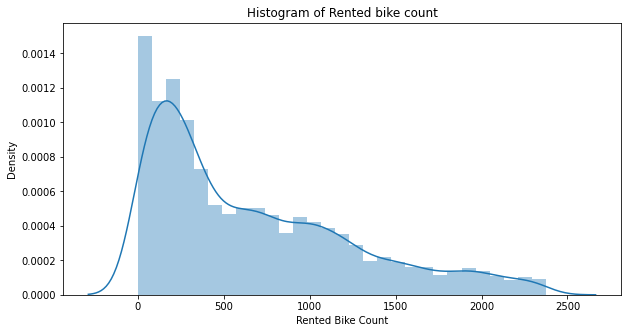

In [112]:
# histogram of bike count
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Histogram of Rented bike count')
ax=sns.distplot(new_data['Rented Bike Count'] )

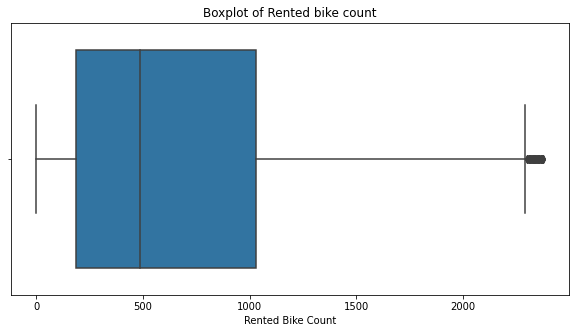

In [113]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Boxplot of Rented bike count')
ax=sns.boxplot(new_data['Rented Bike Count']);

**After the treatment of the outliers we now have 8602 rows as compare to 8760 rows earlier**

In [114]:
numerical_features=list(new_data.describe().columns)

In [115]:
numerical_features[1:]

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

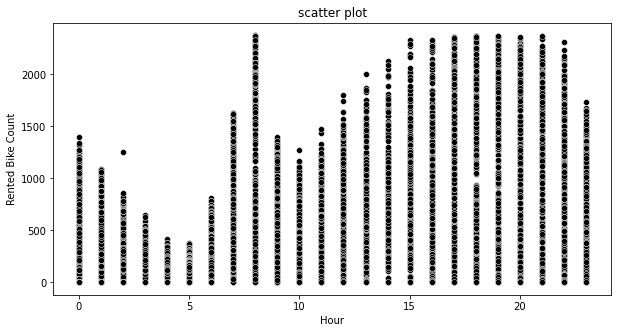

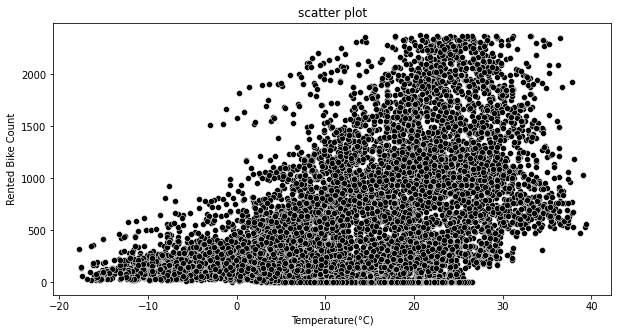

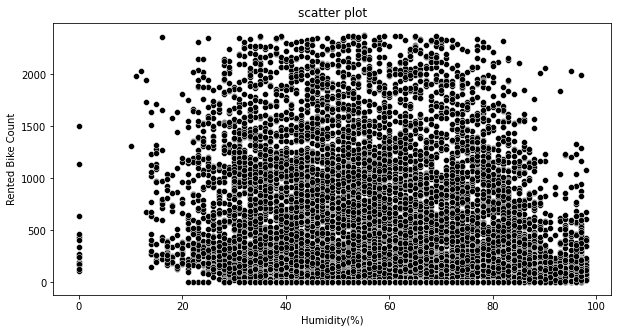

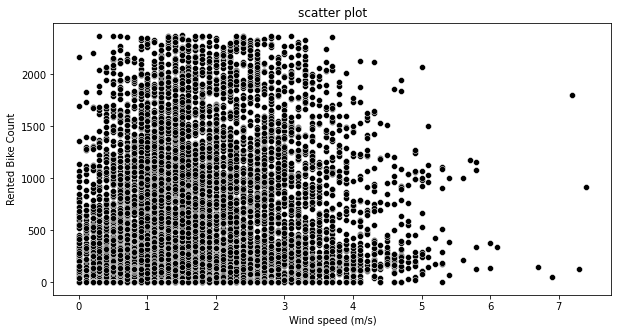

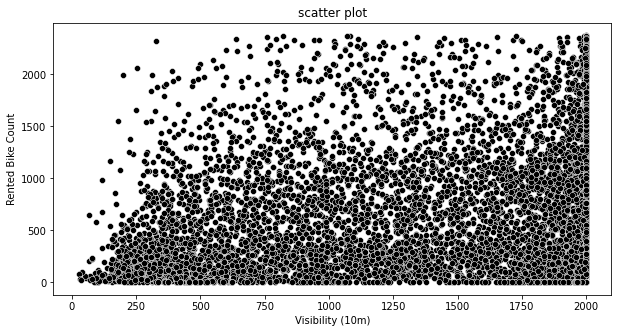

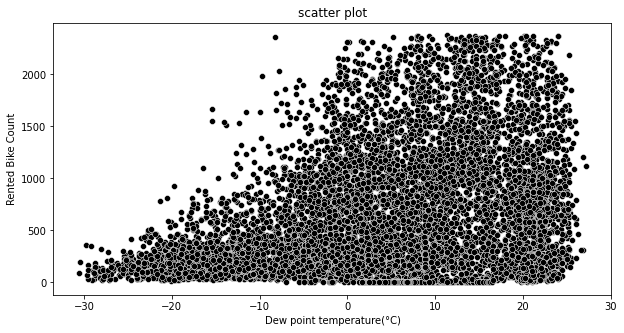

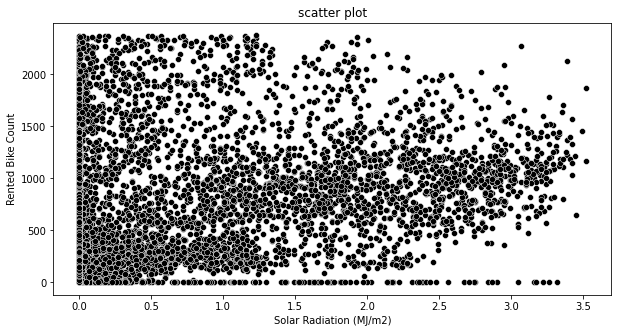

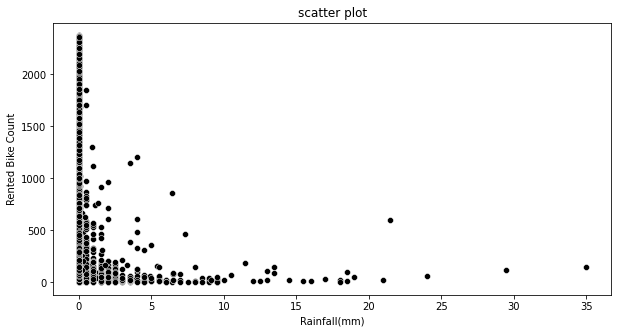

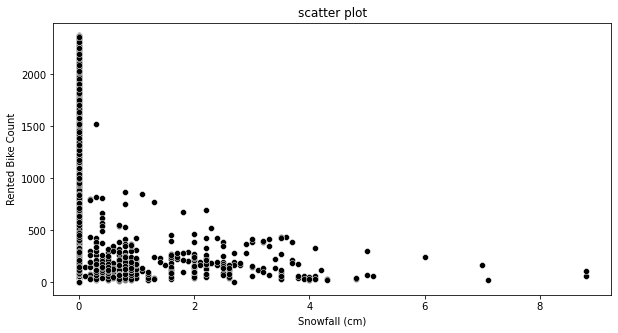

''

In [116]:
for i in numerical_features[1:]:
  
  sns.scatterplot(new_data[i],new_data['Rented Bike Count'],color='black')

  plt.title('scatter plot')
  plt.ylabel('Rented Bike Count')
  plt.xlabel(i)
  plt.show()
;

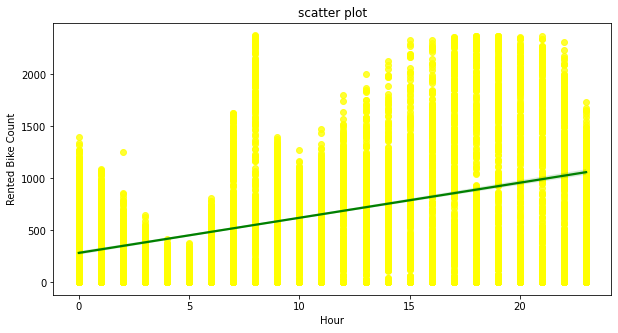

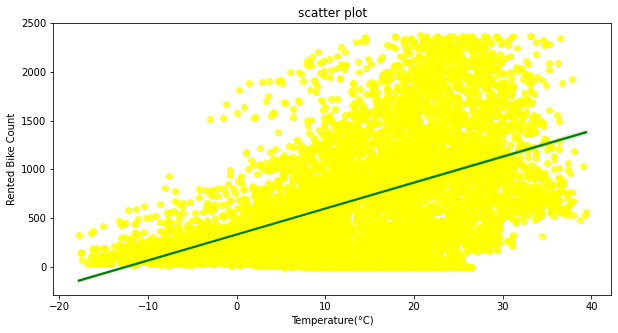

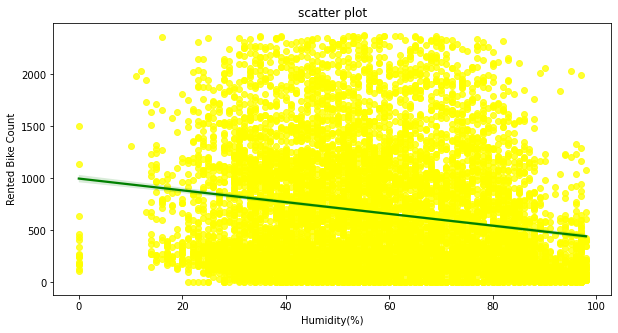

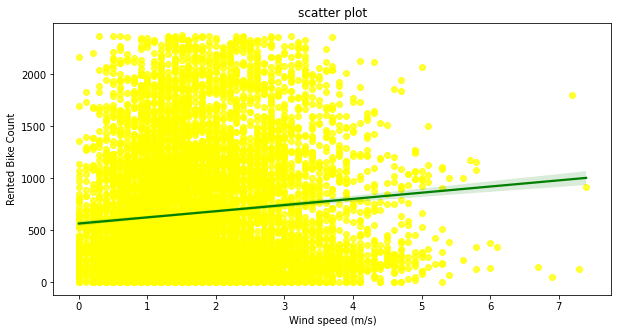

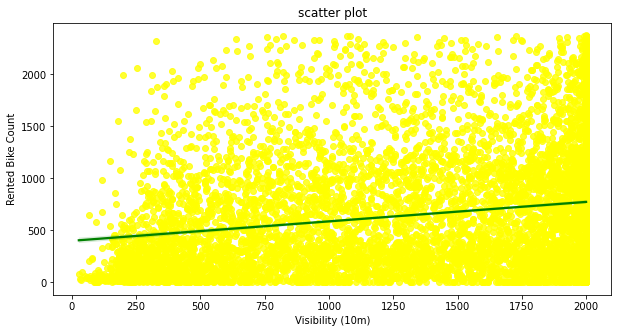

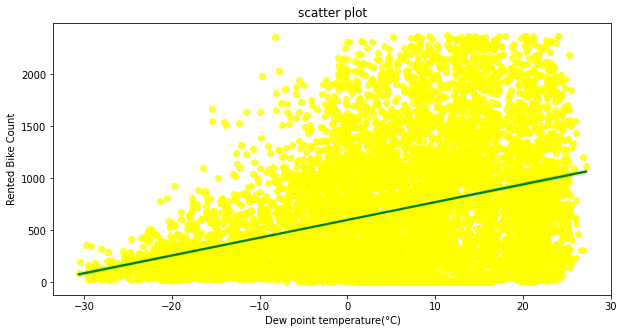

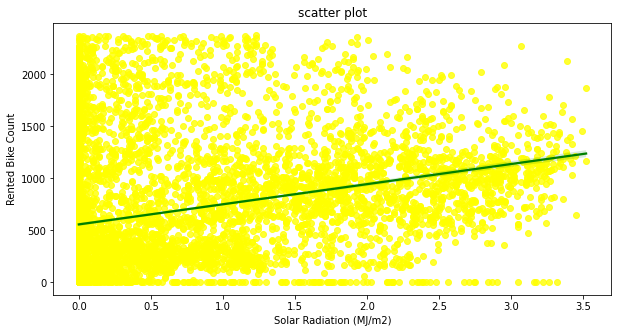

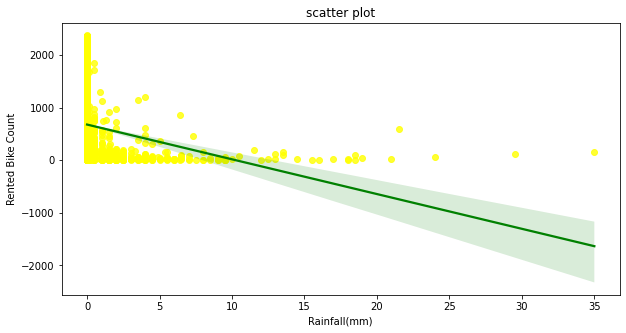

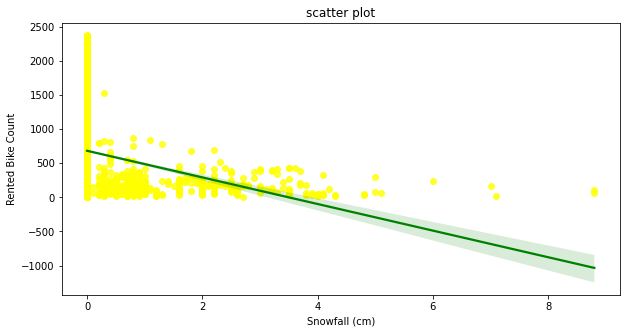

In [117]:
for i in numerical_features[1:]:
  
  sns.regplot(new_data[i],new_data['Rented Bike Count'],scatter_kws={"color": "yellow"}, line_kws={"color": "green"})

  plt.title('scatter plot')
  plt.ylabel('Rented Bike Count')
  plt.xlabel(i)
  plt.show()

In [118]:
new_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


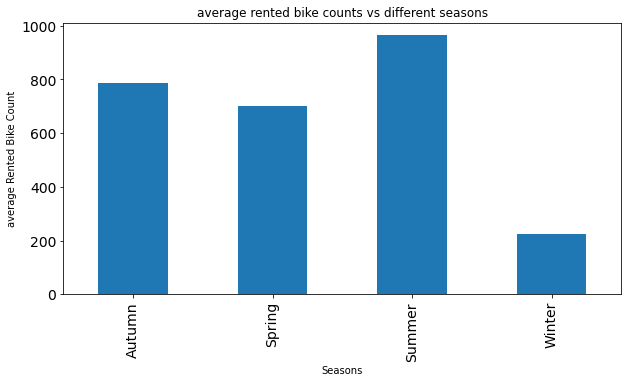

In [119]:
ax = new_data.groupby(['Seasons'])['Rented Bike Count'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('average rented bike counts vs different seasons')
plt.xlabel('Seasons')

plt.ylabel('average Rented Bike Count');

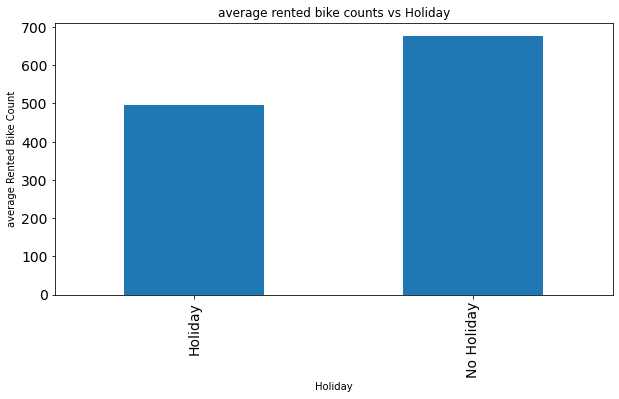

In [120]:
ax = new_data.groupby(['Holiday'])['Rented Bike Count'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('average rented bike counts vs Holiday')
plt.xlabel('Holiday')

plt.ylabel('average Rented Bike Count');

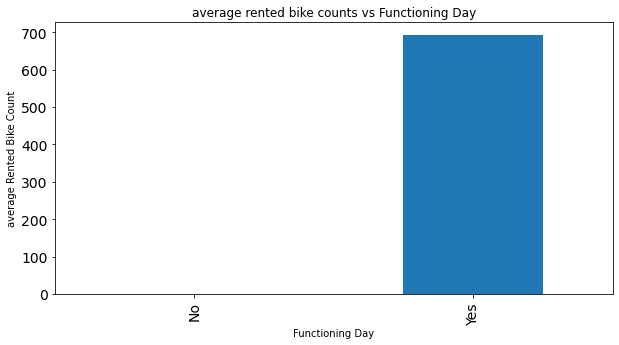

In [121]:
ax = new_data.groupby(['Functioning Day'])['Rented Bike Count'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('average rented bike counts vs Functioning Day')
plt.xlabel('Functioning Day')

plt.ylabel('average Rented Bike Count');

In [122]:
#changing the datatype of date feature from object type to datetime .
new_data['Date'] = pd.to_datetime(new_data['Date'])


In [123]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8602 non-null   datetime64[ns]
 1   Rented Bike Count          8602 non-null   int64         
 2   Hour                       8602 non-null   int64         
 3   Temperature(°C)            8602 non-null   float64       
 4   Humidity(%)                8602 non-null   int64         
 5   Wind speed (m/s)           8602 non-null   float64       
 6   Visibility (10m)           8602 non-null   int64         
 7   Dew point temperature(°C)  8602 non-null   float64       
 8   Solar Radiation (MJ/m2)    8602 non-null   float64       
 9   Rainfall(mm)               8602 non-null   float64       
 10  Snowfall (cm)              8602 non-null   float64       
 11  Seasons                    8602 non-null   object        
 12  Holida

In [124]:
new_data['month']=new_data.Date.dt.month
new_data['Day_name']=new_data.Date.dt.day_name()
new_data['year']=new_data.Date.dt.year


In [125]:
new_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,Day_name,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017


In [126]:
new_data.shape

(8602, 17)

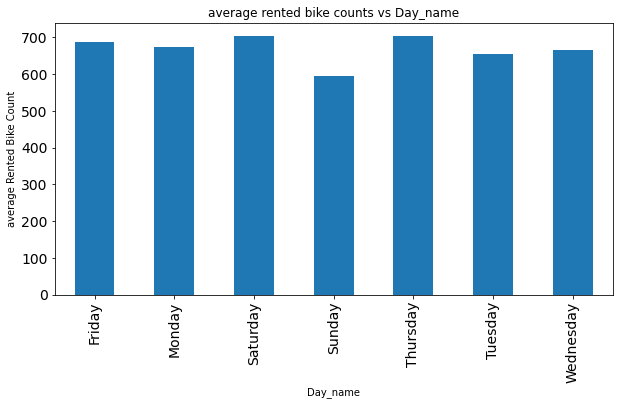

In [127]:
ax = new_data.groupby(['Day_name'])['Rented Bike Count'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('average rented bike counts vs Day_name')
plt.xlabel('Day_name')

plt.ylabel('average Rented Bike Count');

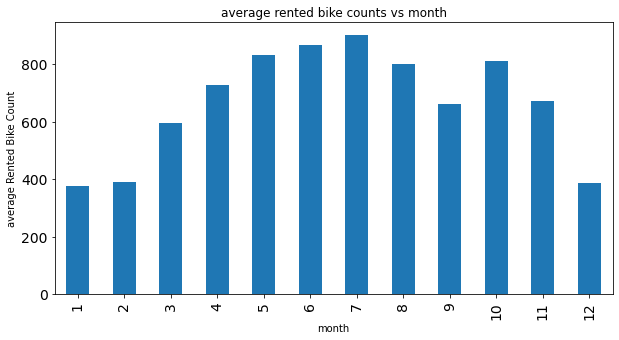

In [128]:
ax = new_data.groupby(['month'])['Rented Bike Count'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14)
plt.title('average rented bike counts vs month')
plt.xlabel('month')

plt.ylabel('average Rented Bike Count');

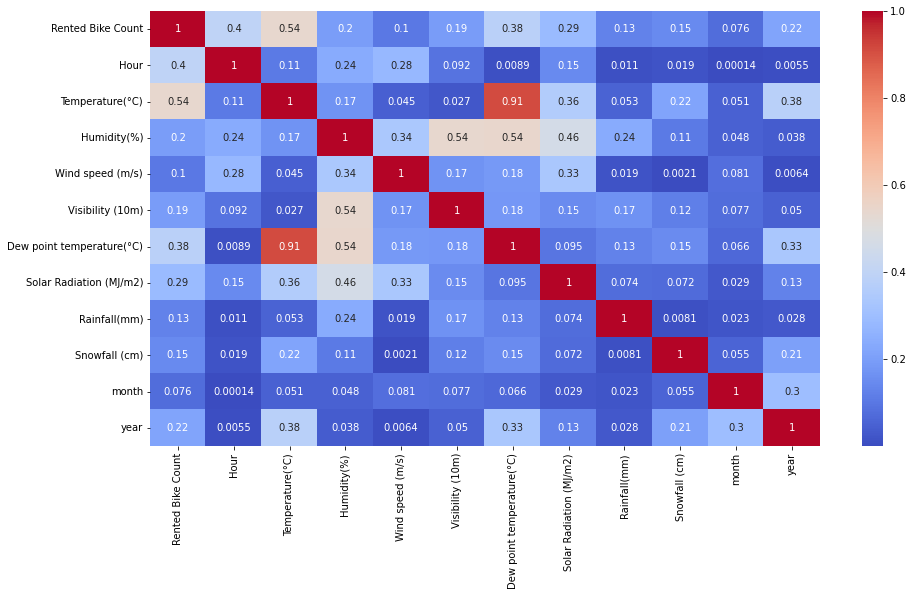

In [129]:
plt.figure(figsize=(15,8))
correlation = new_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm');

**from the above heatmap we can there are some features which have correlation between them. the maximum correlation is between Dew Point Temperature and Temperature then humidity and visiblilty**

# **1. linear regression**

In [130]:
# checking for multicollinearity with the help of VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(new_data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = new_data.columns
    vif["VIF"] = [variance_inflation_factor(new_data.values, i) for i in range(new_data.shape[1])]

    return(vif)

In [131]:
calc_vif(new_data[[i for i in new_data.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.342032
1,Temperature(°C),187.437533
2,Humidity(%),188.653814
3,Wind speed (m/s),4.792025
4,Visibility (10m),10.331501
5,Dew point temperature(°C),128.262905
6,Solar Radiation (MJ/m2),2.929473
7,Rainfall(mm),1.104568
8,Snowfall (cm),1.134331
9,month,4.686302


**From the above experiment i can conclude that Temperature and Dew point temperature(°C) has the VIF more than 10 . so we have to remove them**

In [132]:
new_data.drop(['Temperature(°C)','Dew point temperature(°C)'], axis = 1,inplace=True)

In [133]:
calc_vif(new_data[[i for i in new_data.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.149933
1,Humidity(%),18.156826
2,Wind speed (m/s),4.676017
3,Visibility (10m),9.657596
4,Solar Radiation (MJ/m2),1.940734
5,Rainfall(mm),1.090567
6,Snowfall (cm),1.056338
7,month,4.681318
8,year,50.453780


now our dataset features have VIF of less than 10. so now our numerical features do not multicollinearity.

# feature engineering

In [134]:
#one hot encoding on categorical variables
new_data= pd.get_dummies(new_data, columns=["Seasons", "Holiday","Functioning Day","Day_name",'year'], prefix=["Seasons", "Holiday","Functioning Day","Day_name",'year'])


In [135]:
new_data

,Date,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Day_name_Friday,Day_name_Monday,Day_name_Saturday,Day_name_Sunday,Day_name_Thursday,Day_name_Tuesday,Day_name_Wednesday,year_2017,year_2018
0,2017-01-12,254,0,37,2.2,2000,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
1,2017-01-12,204,1,38,0.8,2000,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
2,2017-01-12,173,2,39,1.0,2000,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
3,2017-01-12,107,3,40,0.9,2000,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
4,2017-01-12,78,4,36,2.3,2000,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,34,2.6,1894,0.0,0.0,0.0,11,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1
8756,2018-11-30,764,20,37,2.3,2000,0.0,0.0,0.0,11,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1
8757,2018-11-30,694,21,39,0.3,1968,0.0,0.0,0.0,11,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1
8758,2018-11-30,712,22,41,1.0,1859,0.0,0.0,0.0,11,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1


In [138]:
new_data.drop(['Date'],axis=1,inplace=True)

In [139]:
new_data.shape

(8602, 26)

In [140]:
# Create a list of independent variables
dependent_variable='Rented Bike Count'


independent_variables = list(set(new_data.columns.tolist()) - {dependent_variable})

In [141]:
independent_variables

['Wind speed (m/s)',
 'Humidity(%)',
 'Snowfall (cm)',
 'month',
 'year_2018',
 'Solar Radiation (MJ/m2)',
 'Hour',
 'Seasons_Winter',
 'Day_name_Sunday',
 'Functioning Day_No',
 'Holiday_No Holiday',
 'Day_name_Wednesday',
 'Seasons_Autumn',
 'Day_name_Friday',
 'Day_name_Thursday',
 'Seasons_Summer',
 'Day_name_Tuesday',
 'Holiday_Holiday',
 'Day_name_Monday',
 'Day_name_Saturday',
 'Rainfall(mm)',
 'Functioning Day_Yes',
 'year_2017',
 'Seasons_Spring',
 'Visibility (10m)']

**Train test split**

In [146]:
X=new_data[independent_variables].values
y=new_data[dependent_variable].values

In [147]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6881, 25)
(1721, 25)


In [148]:
X_train[0:10]

array([[1.200e+00, 8.300e+01, 5.100e+00, 1.200e+01, 0.000e+00, 9.000e-02,
        1.200e+01, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.100e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        3.510e+02],
       [2.400e+00, 5.200e+01, 0.000e+00, 7.000e+00, 1.000e+00, 1.930e+00,
        1.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.438e+03],
       [1.600e+00, 5.800e+01, 0.000e+00, 7.000e+00, 1.000e+00, 0.000e+00,
        2.300e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+03],
       [0.000e+00, 7.500e+01, 0.000e+00, 5.000e+00, 

In [149]:
#scaling with the help of MinMax scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
X_train[0:10]

array([[0.16438356, 0.84693878, 0.57954545, 1.        , 0.        ,
        0.02556818, 0.52173913, 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.03142857, 1.        , 1.        , 0.        , 0.16421693],
       [0.32876712, 0.53061224, 0.        , 0.54545455, 1.        ,
        0.54829545, 0.73913043, 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.71515459],
       [0.21917808, 0.59183673, 0.        , 0.54545455, 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.

In [151]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [152]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [154]:
print(y_pred)
print(y_test)

[ 309.34038185 -128.32234572  304.07172104 ...  390.22165459  460.3815976
 1369.85542715]
[1089    0  190 ...  281  233 1288]


In [155]:
#evalution matrix
mean_squared_error(y_test, y_pred)

158152.54951269616

In [158]:
regressor.score(X_test, y_test)

0.5301482059081055

In [156]:
r2_score(y_test, y_pred)

0.5301482059081055